In [1]:
## Cell track timeseries

In [128]:
import pandas as pd
import datetime
import matplotlib.dates as mdates
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [129]:
time_series = '/home/rjackson/data/stormcalcs_darwin_example.csv'
storm_tracks = pd.read_csv(time_series)
print(storm_tracks.keys())

Index(['scan', 'uid', 'area', 'grid_x', 'grid_y', 'isolated', 'lat', 'lon',
       'max', 'max_alt', 'time', 'vol', 'file', 'mdopfile', 'kdp_pct',
       'kdp_pet', 'zdr_pct', 'zdr_pet', 'zhh_pct', 'zhh_pet', 'max_w'],
      dtype='object')


[         nan          nan          nan          nan          nan
          nan          nan          nan   6.4567795    7.5594862
          nan          nan          nan   8.32353144   9.25214333
   7.60643692   9.40854189  11.78256511  10.60904189   7.85721339
   7.80444628   7.54175597          nan          nan          nan
          nan          nan          nan          nan          nan
          nan]


(0, 15)

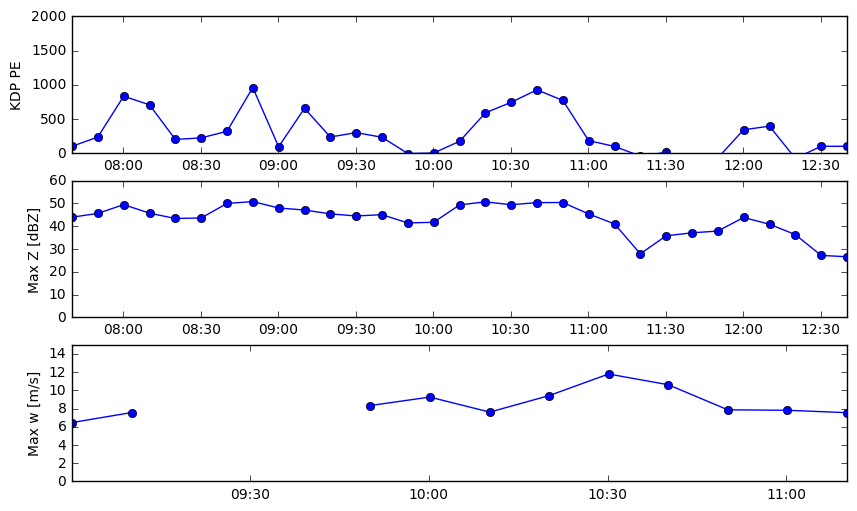

In [142]:
uid = storm_tracks['uid'].values
time = storm_tracks['time'].values
kdp_pct = storm_tracks['kdp_pet'].values
zhh_pct = storm_tracks['zhh_pct'].values
max_w = storm_tracks['max_w'].values
isolated = storm_tracks['isolated'].values
kdp_pct[kdp_pct == '--'] = 'nan'
kdp_pct = kdp_pct.astype(float)
indicies = np.where(uid == 22)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
plt.plot([datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in time[indicies]], kdp_pct[indicies], marker='o')
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(0,60,30)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('KDP PE')
plt.ylim([0, 2000])

ax2 = fig.add_subplot(312)
plt.plot([datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in time[indicies]], zhh_pct[indicies], marker='o')
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(0,60,30)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Max Z [dBZ]')
plt.ylim([0, 60])

ax2 = fig.add_subplot(313)
print(max_w[indicies])
plt.plot([datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in time[indicies]], max_w[indicies], marker='o')
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(0,60,30)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Max w [m/s]')
plt.ylim([0, 15])